# Interactive Graph Plot
## Here we can comment on python normal distribution interactively from a plot.
### First I am Making a sample of Normal Distribution in Python:

In [1]:
import pandas as pd
import numpy as np


# Normal Distribution.
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-227421.764381,100540.553689,186634.637468,68730.578842,25351.809184,30516.026954,126213.412543,26544.016800,-286851.925178,2091.802204,...,150911.856008,106058.501074,-46692.259944,-218509.415974,82956.709363,60614.182140,19736.360427,-84504.064410,273626.440097,89186.212913
1993,214490.124568,-57609.778894,64663.206478,37115.417560,65860.945045,130636.725508,44774.331335,2367.824303,139339.632654,234356.420849,...,-6520.875593,193905.704872,4762.858738,-35430.902145,60351.688068,120662.991975,-74187.753162,-31469.366672,-109064.049772,227200.918369
1994,328923.264029,204261.736593,-19037.661190,-108287.959666,86282.971585,-43607.723209,163693.689999,60626.063191,207329.801846,8658.305488,...,40075.967583,144390.251372,-135164.158941,-297681.197879,98891.738566,182155.207964,22732.648820,-7827.187494,121340.076246,-226074.351323
1995,116290.485101,44774.946136,102299.116773,64156.469009,29019.110024,-91313.462790,16464.737777,126630.271991,36025.974493,99621.057938,...,98121.415680,137049.937838,213947.712414,-103766.148444,102876.303452,9347.265145,67264.071970,-15028.472296,143543.674453,113488.122496


#### Then importing necessary Libraries.

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import matplotlib as mpl

### Calculating Confidence Interval (CI):
##### CI(Confidence Interval) = X_bar +- Z*(sigma/root(n))

In [3]:
x = list(df.index)

# Calculating Mean of each row.
m = [df.loc[i].mean() for i in df.index]

# Calculating Standard Deviation of each row.
sigma = [df.loc[i].std() for i in df.index]

# Taking Sample size of each row.
n = len(df.columns)

# Manually putting Z value for 95% Confidence
Z = 1.96

# Calculating Error from the mean value
yerror = [Z*(i/math.sqrt(n)) for i in sigma]

## Plotting Interactive Graph:
#### In this graph we can interactively choose a mean value by the mouse cursor and based on that we get a overview if the mean value lies in the 95% Confidence level or not.
#### White = is equal
#### Red = Certainly Above
#### Light Red = Maybe Above
#### Light blue = Maybe below
#### Blue = Certainly below

<IPython.core.display.Javascript object>


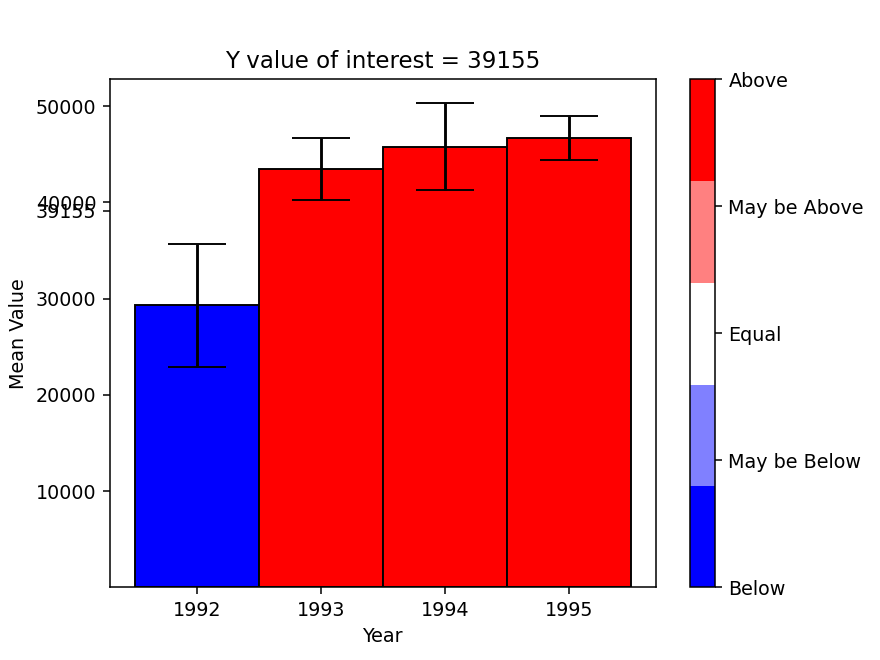

In [4]:
%matplotlib notebook
from matplotlib import cm

# Plotting Bar plot.
fig, ax = plt.subplots()
bars = ax.bar(x, m, width=1, edgecolor='k', yerr=yerror, capsize=15)
ax.set_xticks(x)
ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')

# Creating a cursor object.
cursor = Cursor(ax, horizOn=True, vertOn=False, color='k', linewidth=1.5, linestyle='--', useblit=False)
def mouse_motion(event):
    x1, y1 = event.xdata, event.ydata
    def bar(i):
        if y1 < (m[i]-yerror[i]) :
            return 'red'
        elif y1 < m[i]-100 and y1 > (m[i]-yerror[i]) :
            return '#ff8080'
        elif y1 > (m[i]+yerror[i]) :
            return 'blue'
        elif y1 > m[i]+100 and y1 < (m[i]+yerror[i]) :
            return '#8080ff'
        else :
            return '#FFFFFF'
        
    bars[0].set_color(bar(0))
    bars[0].set_edgecolor('k')
    bars[1].set_color(bar(1))
    bars[1].set_edgecolor('k')
    bars[2].set_color(bar(2))
    bars[2].set_edgecolor('k')
    bars[3].set_color(bar(3))
    bars[3].set_edgecolor('k')
    
    ax.set_title('Y value of interest = {}'.format(int(y1)))
    ax.set_yticks([10000, 20000, 30000, 40000, 50000, int(y1)])
    plt.colorbar()


fig.canvas.mpl_connect('motion_notify_event', mouse_motion)

#For Colorbar :
norm = mpl.colors.Normalize()
sm = plt.cm.ScalarMappable(cmap=plt.get_cmap('bwr', 5), norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=[0, 0.25, 0.5, 0.75, 1.0])
cbar.ax.set_yticklabels(['Below', 'May be Below', 'Equal', 'May be Above', 'Above'])


plt.show()